In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/website_classification.csv")

In [3]:
df.head(5)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1408 non-null   int64 
 1   website_url           1408 non-null   object
 2   cleaned_website_text  1408 non-null   object
 3   Category              1408 non-null   object
dtypes: int64(1), object(3)
memory usage: 44.1+ KB


In [5]:
df.shape

(1408, 4)

In [6]:
df.isna().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [9]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [10]:
df_target = df.groupby("Category").count().sort_values(by = "Category" , ascending = True)
df_target

,website_url,cleaned_website_text
Category,,
Adult,16,16
Business/Corporate,109,109
Computers and Technology,93,93
E-Commerce,102,102
Education,114,114
Food,92,92
Forums,16,16
Games,98,98
Health and Fitness,96,96


<Axes: xlabel='count', ylabel='Category'>

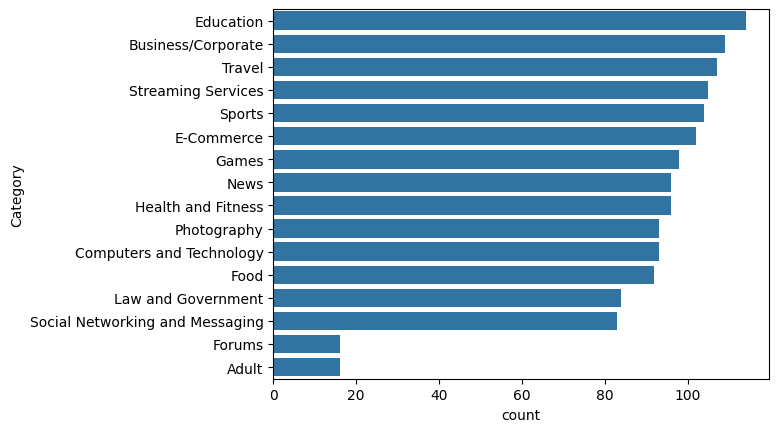

In [11]:
sns.countplot(y = df["Category"] , order = df["Category"].value_counts().index[:16])

# **Start the procces of NLP:**

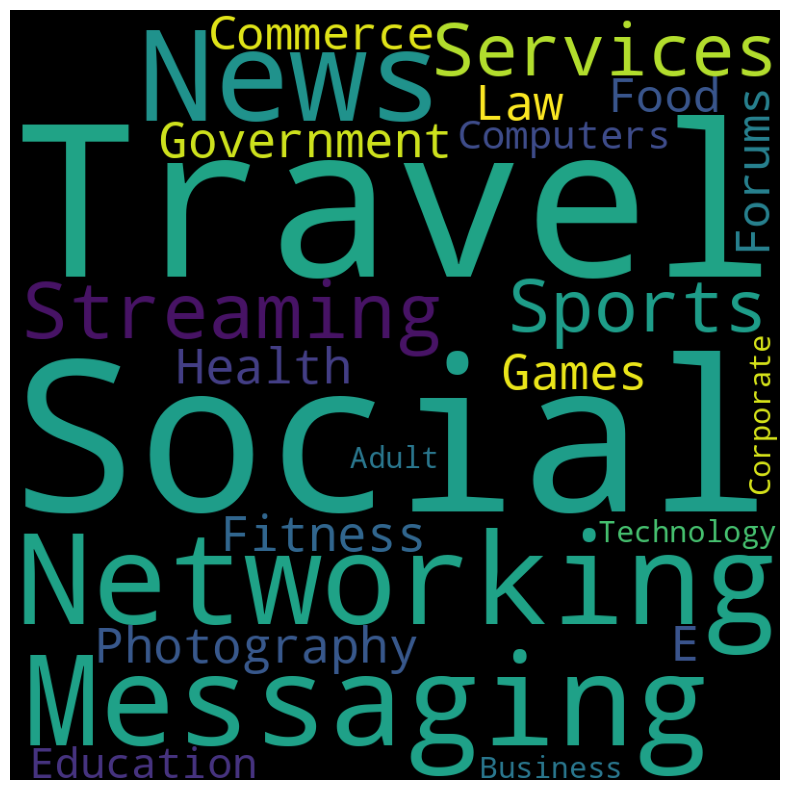

In [12]:
df_copy = df.copy()
from wordcloud import WordCloud
keywords = df_copy["Category"].unique().astype(str)
wordcloud = WordCloud(contour_color='black' , max_words=500 , width = 800 , height=800).generate(" ".join(keywords))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy["Category"] = le.fit_transform(df_copy["Category"])
df_copy.head()

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,15
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,15
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,15
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,15
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,15


<Axes: xlabel='count', ylabel='Category'>

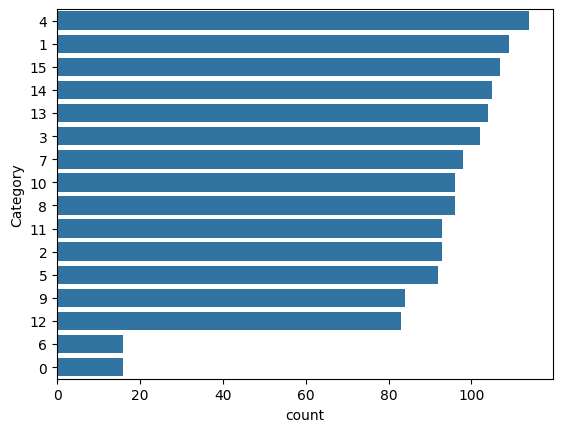

In [14]:
sns.countplot(y = df_copy["Category"] , order = df_copy["Category"].value_counts().index[:16])

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


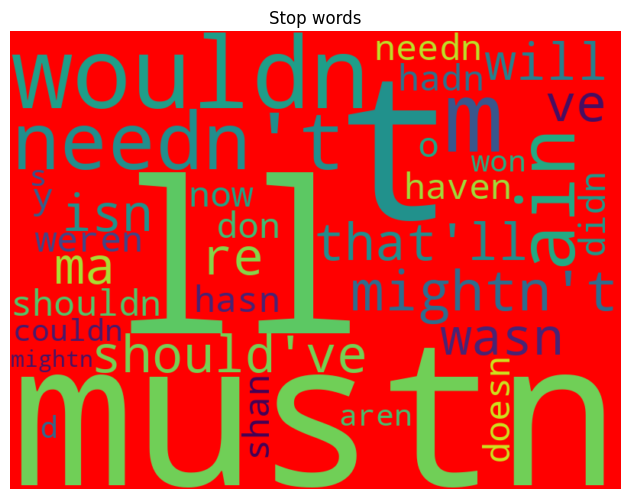

In [16]:

wordcloud = WordCloud(width=800, height=600 , contour_color='white' , background_color = "red").generate(' '.join(stopwords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Stop words')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
import re
dictionary = []
for c in range (0 , len(df_copy)):
  cleaning = re.sub("[^a-zA-Z]" , " " , df_copy["cleaned_website_text"][c])
  cleaning = cleaning.lower()
  cleaning = cleaning.split()
  cleaning = [ps.stem(word) for word in cleaning if not word in stopwords]
  cleaning = " ".join(cleaning)
  dictionary.append(cleaning)

dictionary[500]

'usa today latest world news usa today deliv current local nation news sport entertain financ technolog award win journal photo video vr usa today usatoday world news intern news news nation news money sport entertain opinion tech travel review food dine voic ad content right news sport entertain life money tech travel opinion weather job network moonlight inform medium partner stay connect subscrib home deliveri news sport entertain life money tech travel opinion weather icon humid precip wind open set set enter citi cancel set close set forecast crossword best sell book classifi correct job network moonlight news tip news sport entertain life money tech travel opinion weather crossword best sell book classifi correct job network moonlight news tip subscrib salut manag account access e edit newslett pay bill report deliveri issu paus deliveri help center sign exist account sign subscript activ account account creat advertis elect vote cast elector colleg meet live updat read stori adm

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 8000
len_sentence = 20
visualize_hot = [one_hot(words , vocab_size) for words in dictionary]
visualize_hot[500]

[1045,
 6054,
 3776,
 342,
 4402,
 1045,
 6054,
 5246,
 6662,
 7344,
 7600,
 4402,
 2976,
 6858,
 6905,
 667,
 6862,
 1,
 3637,
 3911,
 747,
 690,
 1045,
 6054,
 7885,
 342,
 4402,
 3666,
 4402,
 4402,
 7600,
 4402,
 5153,
 2976,
 6858,
 2576,
 5178,
 2556,
 893,
 1684,
 592,
 5602,
 6410,
 2891,
 4543,
 4402,
 2976,
 6858,
 6962,
 5153,
 5178,
 2556,
 2576,
 125,
 5074,
 640,
 5026,
 2514,
 5315,
 5559,
 7557,
 440,
 209,
 3115,
 7541,
 4402,
 2976,
 6858,
 6962,
 5153,
 5178,
 2556,
 2576,
 125,
 2086,
 726,
 2564,
 1458,
 2998,
 4869,
 4869,
 1840,
 4068,
 3320,
 4869,
 3024,
 4869,
 726,
 6349,
 4012,
 4425,
 3926,
 4048,
 1260,
 5074,
 640,
 5026,
 4402,
 7193,
 4402,
 2976,
 6858,
 6962,
 5153,
 5178,
 2556,
 2576,
 125,
 6349,
 4012,
 4425,
 3926,
 4048,
 1260,
 5074,
 640,
 5026,
 4402,
 7193,
 209,
 1069,
 7162,
 2031,
 5950,
 4682,
 2812,
 7645,
 5431,
 5838,
 1572,
 7541,
 973,
 2878,
 7541,
 142,
 241,
 6504,
 5181,
 2031,
 6504,
 1934,
 2316,
 2031,
 2031,
 7649,
 205,
 71

In [20]:
from tensorflow.keras.utils import pad_sequences
visualize_hot = pad_sequences(visualize_hot , padding = "pre" , maxlen = len_sentence)
visualize_hot[500]

array([6542, 1002, 7497, 6623, 3115, 7541, 7162, 1934, 4682,  458, 1045,
       6054, 3749, 2026, 7908, 6347, 3010, 7645, 6589, 7165], dtype=int32)

In [21]:
X = df_copy["cleaned_website_text"]
y = df_copy["Category"]
y = np.array(y)
X = np.array(visualize_hot)
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# ساخت مدل شبکه عصبی
model = Sequential()

# افزودن لایه‌های Dense
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# لایه خروجی با تابع فعال‌سازی softmax برای کلاسیفیکیشن
model.add(Dense(units=16, activation='softmax'))

# کامپایل مدل
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
y_train_categorical = to_categorical(y_train, num_classes=16)
y_test_categorical = to_categorical(y_test, num_classes=16)
# آموزش مدل
model.fit(X_train, y_train_categorical, epochs=50)

# ارزیابی مدل
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0518 - loss: 2.8270
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1181 - loss: 2.7202 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss: 2.6794 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1488 - loss: 2.6426 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1658 - loss: 2.6070
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1915 - loss: 2.5713
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2077 - loss: 2.5348 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2155 - loss: 2.4979 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2231 - loss: 2.4599 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - loss: 2.4218 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2530 - loss: 2.3826 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2688 - loss:

In [39]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,338 (95.07 KB)

 Trainable params: 8,112 (31.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,226 (63.39 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


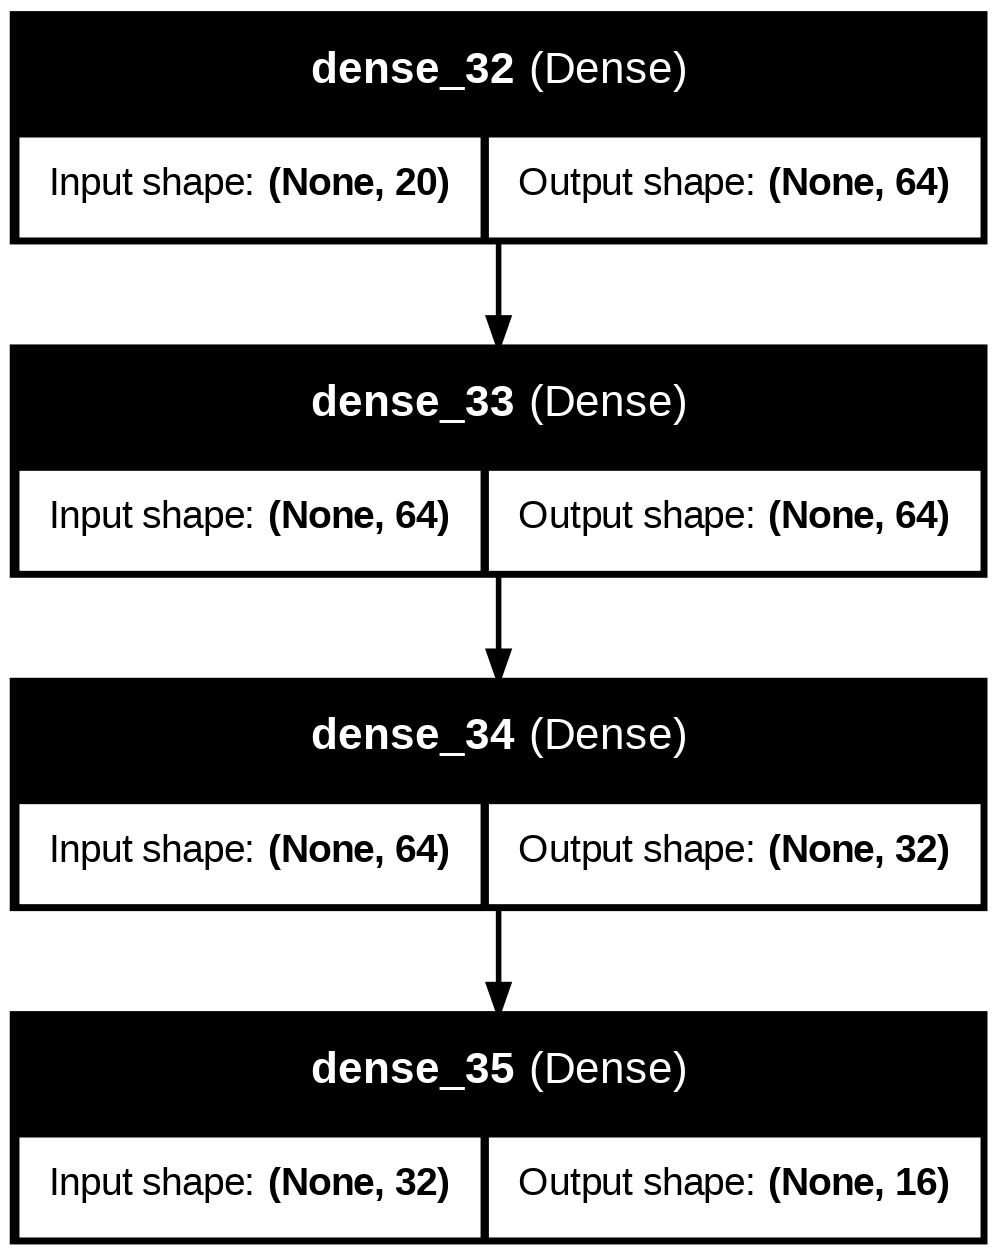

In [40]:
model_predict = model.predict(X_test)
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)